In [ ]:
# %%capture
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# X_df = pd.read_csv('/content/drive/MyDrive/AML/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML/df_y.csv')

X_df = pd.read_csv('datasets_reproducibity/Exchange/S/df_x.csv')
Y_df = pd.read_csv('datasets_reproducibity/Exchange/S/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...
7583,2010-10-06,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_df

,ds,unique_id,y
0,1990-01-01,OT,-0.124081
1,1990-01-02,OT,-0.113588
2,1990-01-03,OT,-0.078960
3,1990-01-04,OT,-0.082108
4,1990-01-05,OT,-0.066368
...,...,...,...
7583,2010-10-06,OT,0.902640
7584,2010-10-07,OT,0.953585
7585,2010-10-08,OT,0.956124
7586,2010-10-09,OT,0.921979


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## NBeats Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,1990-01-01,OT,-0.124081,-0.5,-0.500000,-0.500000,-0.500000
1,1990-01-02,OT,-0.113588,-0.5,-0.333333,-0.466667,-0.497260
2,1990-01-03,OT,-0.078960,-0.5,-0.166667,-0.433333,-0.494521
3,1990-01-04,OT,-0.082108,-0.5,0.000000,-0.400000,-0.491781
4,1990-01-05,OT,-0.066368,-0.5,0.166667,-0.366667,-0.489041
...,...,...,...,...,...,...,...
7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_train_df = Y_df.iloc[:7492,:]
Y_test_df = Y_df.iloc[7492:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:

Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7492,2010-07-07,OT,1.313849,-0.5,-0.166667,-0.300000,0.012329
1,7493,2010-07-08,OT,1.265496,-0.5,0.000000,-0.266667,0.015068
2,7494,2010-07-09,OT,1.271299,-0.5,0.166667,-0.233333,0.017808
3,7495,2010-07-10,OT,1.300722,-0.5,0.333333,-0.200000,0.020548
4,7496,2010-07-11,OT,1.296545,-0.5,0.500000,-0.166667,0.023288
...,...,...,...,...,...,...,...,...
91,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
92,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
93,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
94,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2010-07-07,OT,1.313849,-0.5,-0.166667,-0.300000,0.012329
1,2010-07-08,OT,1.265496,-0.5,0.000000,-0.266667,0.015068
2,2010-07-09,OT,1.271299,-0.5,0.166667,-0.233333,0.017808
3,2010-07-10,OT,1.300722,-0.5,0.333333,-0.200000,0.020548
4,2010-07-11,OT,1.296545,-0.5,0.500000,-0.166667,0.023288
...,...,...,...,...,...,...,...
91,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
92,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
93,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
94,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 96
model = NBEATS(h=horizon,
               input_size=24,
               max_steps=2000,
               )

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='D')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NBEATS
unique_id,,
OT,0,1.281929
OT,1,1.290107
OT,2,1.306959
OT,3,1.321493
OT,4,1.389360
...,...,...
OT,91,1.143590
OT,92,1.153171
OT,93,1.143838


<Axes: xlabel='ds'>

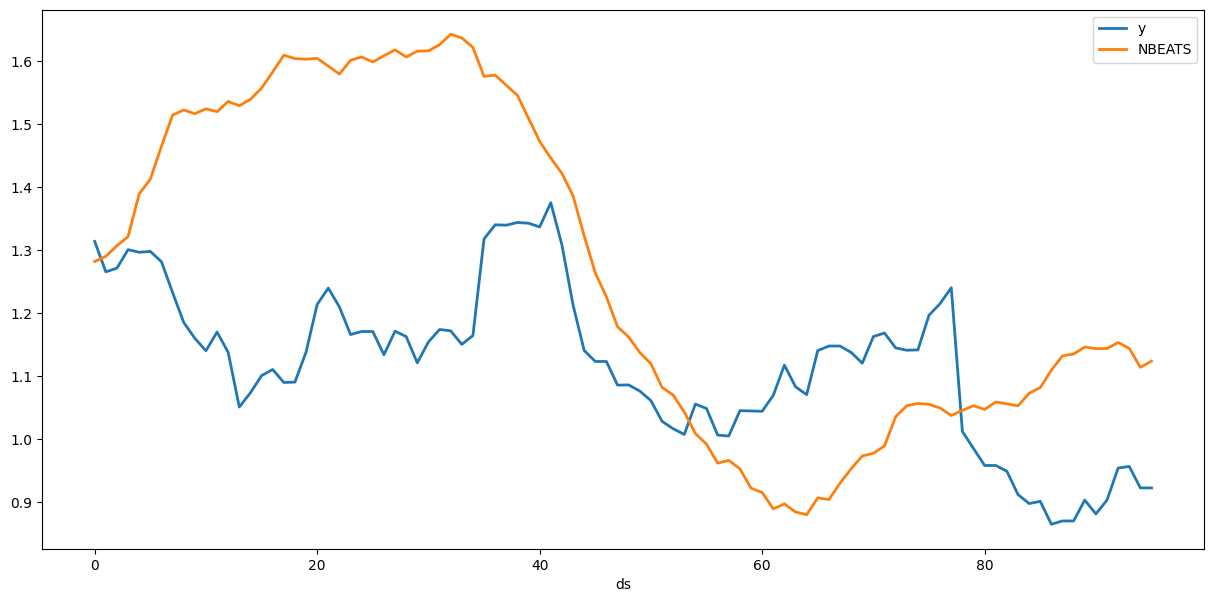

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NBEATS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NBEATS
ds,
0,1.281929
1,1.290107
2,1.306959
3,1.321493
4,1.389360
...,...
91,1.143590
92,1.153171
93,1.143838


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['NBEATS'])
mse_autoformer = mse(Y_test_df['y'], forecasts['NBEATS'])
print(f'NBEATS MSE: {mse_autoformer:.3f}')
print(f'NBEATS MAE: {mae_autoformer:.3f}')

NBEATS MSE: 0.073
NBEATS MAE: 0.226


## NBeats Horizon 192

In [ ]:
Y_train_df = Y_df.iloc[:7396,:]
Y_test_df = Y_df.iloc[7396:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7396,2010-04-02,OT,1.251718,-0.5,0.166667,-0.466667,-0.250685
1,7397,2010-04-03,OT,1.138444,-0.5,0.333333,-0.433333,-0.247945
2,7398,2010-04-04,OT,1.138444,-0.5,0.500000,-0.400000,-0.245205
3,7399,2010-04-05,OT,1.138444,-0.5,-0.500000,-0.366667,-0.242466
4,7400,2010-04-06,OT,0.992389,-0.5,-0.333333,-0.333333,-0.239726
...,...,...,...,...,...,...,...,...
187,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
188,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
189,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
190,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2010-04-02,OT,1.251718,-0.5,0.166667,-0.466667,-0.250685
1,2010-04-03,OT,1.138444,-0.5,0.333333,-0.433333,-0.247945
2,2010-04-04,OT,1.138444,-0.5,0.500000,-0.400000,-0.245205
3,2010-04-05,OT,1.138444,-0.5,-0.500000,-0.366667,-0.242466
4,2010-04-06,OT,0.992389,-0.5,-0.333333,-0.333333,-0.239726
...,...,...,...,...,...,...,...
187,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
188,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
189,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
190,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 192
model = NBEATS(h=horizon, input_size=24,
               max_steps=2000,
              )

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='D')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NBEATS
unique_id,,
OT,0,1.141686
OT,1,1.144001
OT,2,1.169363
OT,3,1.170461
OT,4,1.178957
...,...,...
OT,187,1.018740
OT,188,1.045842
OT,189,1.029897


<Axes: xlabel='ds'>

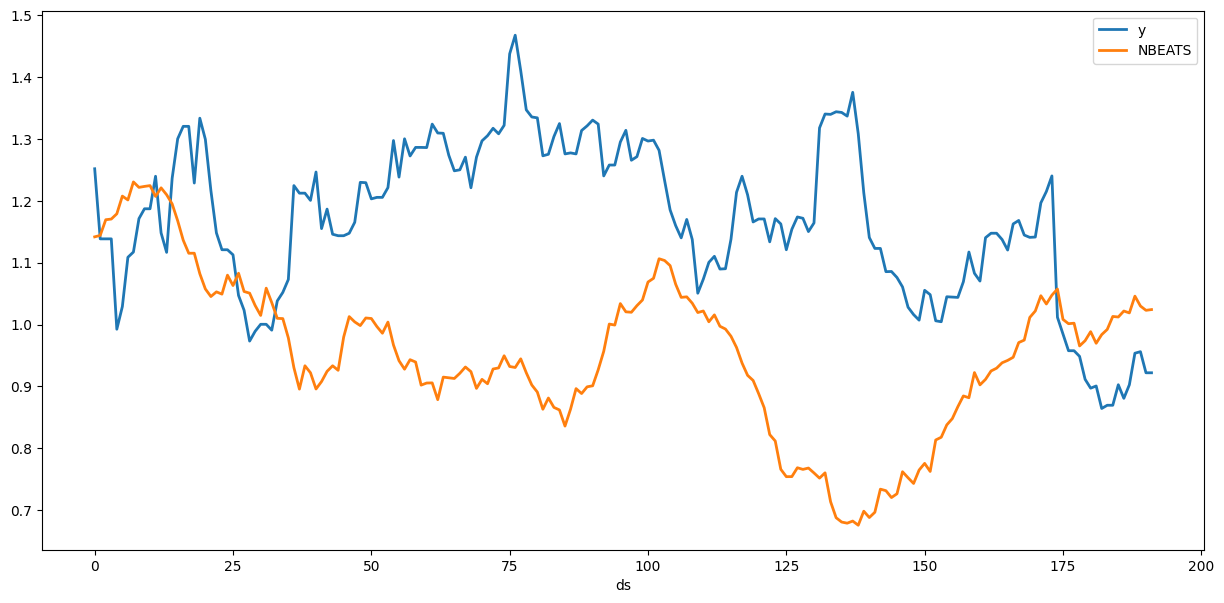

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NBEATS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NBEATS
ds,
0,1.141686
1,1.144001
2,1.169363
3,1.170461
4,1.178957
...,...
187,1.018740
188,1.045842
189,1.029897


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['NBEATS'])
mse_autoformer = mse(Y_test_df['y'], forecasts['NBEATS'])
print(f'NBEATS MSE: {mse_autoformer:.3f}')
print(f'NBEATS MAE: {mae_autoformer:.3f}')

NBEATS MSE: 0.083
NBEATS MAE: 0.243


## NBeatsx Horizon = 336

In [ ]:
Y_train_df = Y_df.iloc[:7252,:]
Y_test_df = Y_df.iloc[7252:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,7252,2009-11-09,OT,0.457496,-0.5,-0.500000,-0.233333,0.354795
1,7253,2009-11-10,OT,0.486961,-0.5,-0.333333,-0.200000,0.357534
2,7254,2009-11-11,OT,0.465229,-0.5,-0.166667,-0.166667,0.360274
3,7255,2009-11-12,OT,0.637980,-0.5,0.000000,-0.133333,0.363014
4,7256,2009-11-13,OT,0.716490,-0.5,0.166667,-0.100000,0.365753
...,...,...,...,...,...,...,...,...
331,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
332,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
333,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
334,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2009-11-09,OT,0.457496,-0.5,-0.500000,-0.233333,0.354795
1,2009-11-10,OT,0.486961,-0.5,-0.333333,-0.200000,0.357534
2,2009-11-11,OT,0.465229,-0.5,-0.166667,-0.166667,0.360274
3,2009-11-12,OT,0.637980,-0.5,0.000000,-0.133333,0.363014
4,2009-11-13,OT,0.716490,-0.5,0.166667,-0.100000,0.365753
...,...,...,...,...,...,...,...
331,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
332,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
333,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
334,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 336
model = NBEATS(h=horizon, input_size=24,
               mlp_units=[[512, 512], [512, 256]],
               max_steps=500)

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='D')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NBEATS
unique_id,,
OT,0,0.484031
OT,1,0.488431
OT,2,0.465665
OT,3,0.438707
OT,4,0.433699
...,...,...
OT,331,0.425544
OT,332,0.481511
OT,333,0.439641


<Axes: xlabel='ds'>

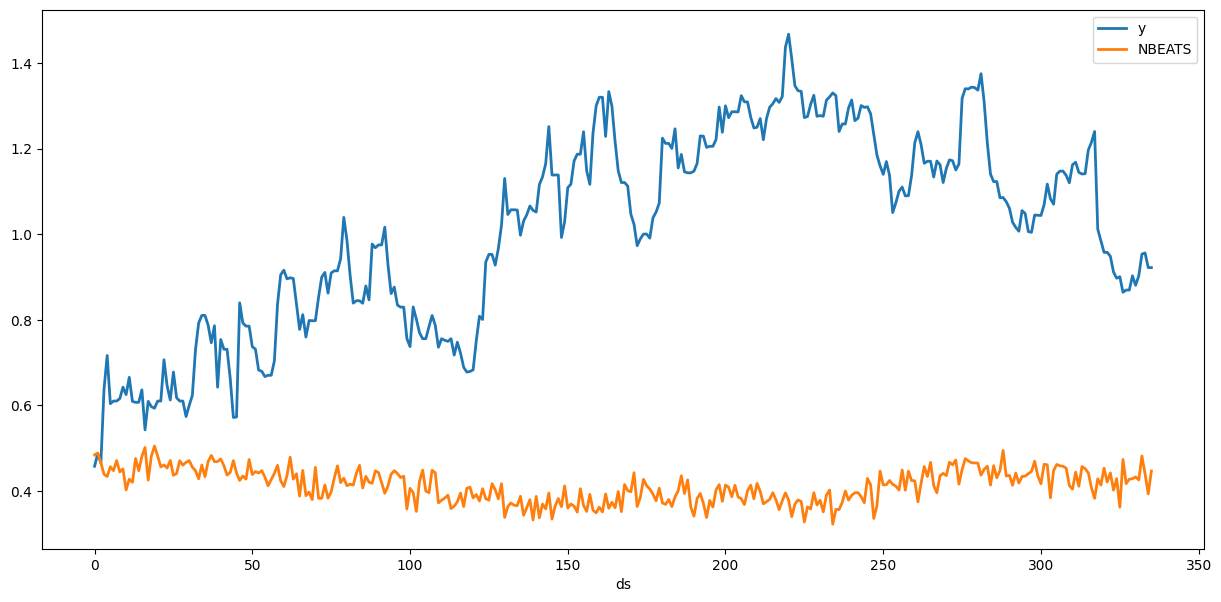

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NBEATS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NBEATS
ds,
0,0.484031
1,0.488431
2,0.465665
3,0.438707
4,0.433699
...,...
331,0.425544
332,0.481511
333,0.439641


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['NBEATS'])
mse_autoformer = mse(Y_test_df['y'], forecasts['NBEATS'])
print(f'NBEATS MSE: {mse_autoformer:.3f}')
print(f'NBEATS MAE: {mae_autoformer:.3f}')

NBEATS MSE: 0.416
NBEATS MAE: 0.594


## NBeatsx Horizon = 720

In [ ]:
Y_train_df = Y_df.iloc[:6868,:]
Y_test_df = Y_df.iloc[6868:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,6868,2008-10-21,OT,1.807954,-0.5,-0.333333,0.166667,0.305479
1,6869,2008-10-22,OT,1.768531,-0.5,-0.166667,0.200000,0.308219
2,6870,2008-10-23,OT,1.776391,-0.5,0.000000,0.233333,0.310959
3,6871,2008-10-24,OT,1.826685,-0.5,0.166667,0.266667,0.313699
4,6872,2008-10-25,OT,1.815562,-0.5,0.333333,0.300000,0.316438
...,...,...,...,...,...,...,...,...
715,7583,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
716,7584,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
717,7585,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
718,7586,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2008-10-21,OT,1.807954,-0.5,-0.333333,0.166667,0.305479
1,2008-10-22,OT,1.768531,-0.5,-0.166667,0.200000,0.308219
2,2008-10-23,OT,1.776391,-0.5,0.000000,0.233333,0.310959
3,2008-10-24,OT,1.826685,-0.5,0.166667,0.266667,0.313699
4,2008-10-25,OT,1.815562,-0.5,0.333333,0.300000,0.316438
...,...,...,...,...,...,...,...
715,2010-10-06,OT,0.902640,-0.5,-0.166667,-0.333333,0.261644
716,2010-10-07,OT,0.953585,-0.5,0.000000,-0.300000,0.264384
717,2010-10-08,OT,0.956124,-0.5,0.166667,-0.266667,0.267123
718,2010-10-09,OT,0.921979,-0.5,0.333333,-0.233333,0.269863


In [ ]:
horizon = 720
model = NBEATS(h=horizon, input_size=24,
               mlp_units=[[512, 256],[256, 128]],
               max_steps=700
               )

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='D')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()

Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,NBEATS,ds
ds,,
0,1.872735,0
1,1.880871,1
2,1.875964,2
3,1.898562,3
4,1.848356,4
...,...,...
715,1.845624,715
716,1.807241,716
717,1.691444,717


<Axes: xlabel='ds'>

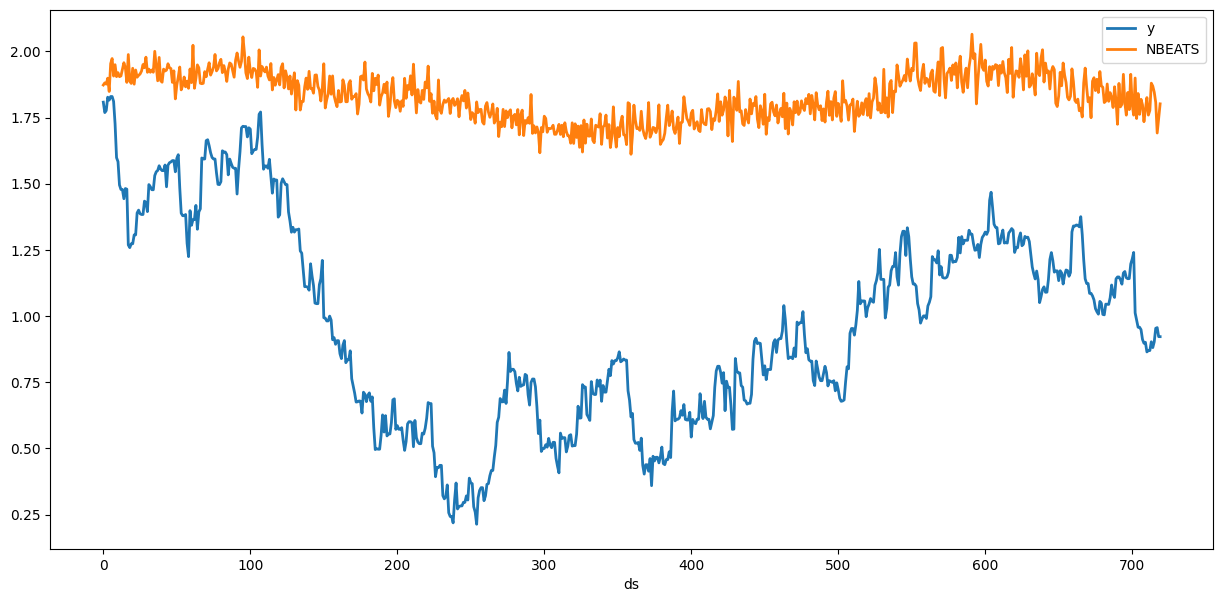

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NBEATS']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,NBEATS
ds,
0,1.872735
1,1.880871
2,1.875964
3,1.898562
4,1.848356
...,...
715,1.845624
716,1.807241
717,1.691444


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['NBEATS'])
mse_autoformer = mse(Y_test_df['y'], forecasts['NBEATS'])
print(f'NBEATS MSE: {mse_autoformer:.3f}')
print(f'NBEATS MAE: {mae_autoformer:.3f}')

NBEATS MSE: 0.840
NBEATS MAE: 0.857
